In [1]:
from setup import *
import sys
if DATA_PATH not in sys.path: sys.path.append(DATA_PATH)
from constants import *

%matplotlib inline
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 200)

In [3]:
import matplotlib
from IPython.display import display, HTML 
%matplotlib inline
np = pd.np
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 250)
%pprint

Pretty printing has been turned ON


In [6]:
df = pd.read_csv(os.path.join(DATA_PATH, 'deduped_tweets.csv.gz'), low_memory=False)
rawlen = len(df)
df.drop_duplicates('id_str', keep='last', inplace=True)
rawlen - len(df)

0

In [7]:
# df.get_
df.get_dtype_counts()

float64    47
int64      12
object      2
dtype: int64

In [8]:
dtypes = pd.Series([df[v].dtype for v in df.columns], index=df.columns)
dtypes

id                   int64
favorite_count       int64
id_str               int64
                     ...  
text                object
favorite_count.1     int64
geo_coordinates     object
dtype: object

In [9]:
mask = [col for col in df.columns if df[col].dtype in (bool, float, np.dtype('int64'))]  # don't forget bool and int64 (not int)!
mask
numbers = df[mask]
numbers

,id,favorite_count,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lat,lon,quoted_status_favorite_count,quoted_status_retweet_count,quoted_status_user_favourites_count,quoted_status_user_followers_count,quoted_status_user_friends_count,quoted_status_user_id,quoted_status_user_id_str,quoted_status_user_listed_count,quoted_status_user_statuses_count,quoted_status_user_utc_offset,retweet_count,retweeted_status_favorite_count,retweeted_status_id,retweeted_status_id_str,retweeted_status_in_reply_to_status_id,retweeted_status_in_reply_to_status_id_str,retweeted_status_in_reply_to_user_id,retweeted_status_in_reply_to_user_id_str,retweeted_status_quoted_status_favorite_count,retweeted_status_quoted_status_retweet_count,retweeted_status_quoted_status_user_favourites_count,retweeted_status_quoted_status_user_followers_count,retweeted_status_quoted_status_user_friends_count,retweeted_status_quoted_status_user_id,retweeted_status_quoted_status_user_id_str,retweeted_status_quoted_status_user_listed_count,retweeted_status_quoted_status_user_statuses_count,retweeted_status_quoted_status_user_utc_offset,retweeted_status_retweet_count,retweeted_status_user_favourites_count,retweeted_status_user_followers_count,retweeted_status_user_friends_count,retweeted_status_user_id,retweeted_status_user_id_str,retweeted_status_user_listed_count,retweeted_status_user_statuses_count,retweeted_status_user_utc_offset,user_favourites_count,user_followers_count,user_friends_count,user_id,user_id_str,user_listed_count,user_statuses_count,user_utc_offset,quoted_status_id,quoted_status_id_str,retweeted_status_quoted_status_id,retweeted_status_quoted_status_id_str,favorite_count.1
0,724276510626979840,0,724276510626979840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,12,2957565833,2957565833,3,182,NaN,NaN,NaN,NaN,NaN,0
1,724276498249572352,0,724276498249572352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,454,197,86312900,86312900,5,117794,25200.0,NaN,NaN,NaN,NaN,0
2,724276388325412866,1,724276388325412866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12475,3110,4998,1391270923,1391270923,60,23206,-14400.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,724275609858392066,0,724275609858392066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,10.0,7.242686e+17,7.242686e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,23339.0,5678.0,39.0,745911914.0,745911914.0,682.0,11640.0,-10800.0,161,867,2,3428977365,3428977365,1514,10422,NaN,NaN,NaN,NaN,NaN,0
183068,724275578879111169,0,724275578879111169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,819,275,385181009,385181009,1,59510,25200.0,NaN,NaN,NaN,NaN,0
183069,724275568871673857,0,724275568871673857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,15,302987528,302987528,4,124,28800.0,NaN,NaN,NaN,NaN,0


In [8]:
# import gzip
# with gzip.open(os.path.join(DATA_PATH, 'numbers.csv.gz'), 'wb') as f:
#     numbers.to_csv(os.path.join(DATA_PATH, 'numbers.csv.gz'), encoding='utf-8')

In [1]:
numbers = pd.read_csv(os.path.join(DATA_PATH, 'numbers.csv.gz'), compression='gzip', engine='python')

NameError: name 'pd' is not defined

In [7]:
[col for col in numbers.columns if 'follow' in col]

['quoted_status_user_followers_count',
 'retweeted_status_quoted_status_user_followers_count',
 'retweeted_status_user_followers_count',
 'user_followers_count']

In [11]:
numbers.columns = [col.replace(' ', '_') for col in numbers.columns]

In [12]:
cols = [col for col in numbers.columns if 'follow' in col]

['quoted_status_user_followers_count',
 'retweeted_status_quoted_status_user_followers_count',
 'retweeted_status_user_followers_count',
 'user_followers_count']

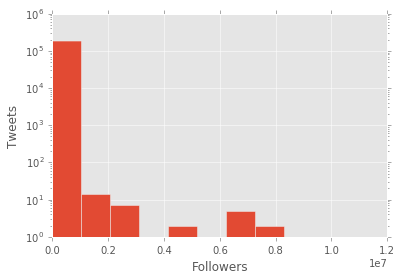

In [19]:
numbers.user_followers_count.hist()
plt.yscale('log', noposy='clip')
plt.ylabel('Tweets')
plt.xlabel('Followers')

In [20]:
# group by user ID before doing plots based on user stats like followers